# Introduction

Customer attrition is one of the biggest expenditures of any organization. Customer churn otherwise known as customer attrition or customer turnover is the percentage of customers that stopped using your company's product or service within a specified timeframe.
For instance, if you began the year with 500 customers but later ended with 480 customers, the percentage of customers that left would be 4%. If we could figure out why a customer leaves and when they leave with reasonable accuracy, it would immensely help the organization to strategize their retention initiatives manifold.



# Notebook overview

In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

# Setup

Installation

Here is the section where we installed all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
#Installatin of packages
!pip install numpy
!pip install pandas
!pip install patool


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importation

Here is the section where we imported all the packages/libraries that will be used through this notebook.

In [2]:
#Importation of packages
# Data handling

import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# EDA (pandas-profiling, etc. )


# Feature Processing (Scikit-learn processing, etc. )


# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )


# Other packages
import os
import warnings
warnings.filterwarnings('ignore')
import patoolib

# Data Loading
Here is the section where we loaded the datasets (train, eval, test) and the additional files.

In [3]:
# Data loading
url = 'https://drive.google.com/file/d/1NVchfOZtO_9G4cgAnKIyNSDbINeh-7q8/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]


In [4]:
# Data loading
churn_df = pd.read_csv(url)

In [5]:
churn_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Hypothesis

In this section we stated our null and alternate hypothesis as well as the questions that we seek to answer.

**Null Hypothesis:** Increase in Monthly charges causes an increase in likelihood of customer churn.

**Alternate Hypothesis:** Increase in Monthly Charges does not cause an increase in likelihood of customer churn.

**Questions:**
1. What is the relationship between tenure and customer churn?
2. Do lower Monthly charges increase tenure?
3. Does gender increase affect customer churn?
4. Do higher total charges increase likelihood of churn?
5. What factors influence churn the most?

# Exploratory Data Analysis: EDA
Here is the section to inspect the datasets in depth, present it, make hypotheses and think the cleaning, processing and features creation.

In [6]:
churn_df.shape

(7043, 21)

The data has 7043 rows and 21 columns

In [7]:
churn_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The data does not appear to have missing values.

In [8]:
churn_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The data does not appear to have NaN values.

In [9]:
churn_df['TotalCharges'] = churn_df['TotalCharges'].replace([' '], '0.0')

In [10]:
TotalCharges = churn_df['TotalCharges']

In [11]:
y = TotalCharges.replace("'","")
print(y) 

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object


In [12]:
y.astype(float)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [13]:
churn_df['TotalCharges'] = pd.DataFrame(y)

In [14]:
churn_df['TotalCharges'].astype(float)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [15]:
churn_df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [16]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are only 4 numerical columns i.e.: SeniorCitizen,tenure and MonthlyCharges.

There seems to be a positive correlation between SeniorCitizen and tenure, there is also a stronger positive correlation between SeniorCitizen and MonthlyCharges.

There is a strong positive correlation between tenure and MonthlyCharges.


In [17]:
# Check for duplicates
churn_df.duplicated().sum()

0

In [18]:
# Columns to ignore
to_ignore_cols = [
    "id", # ID
    
]

# Univariate Data Analysis

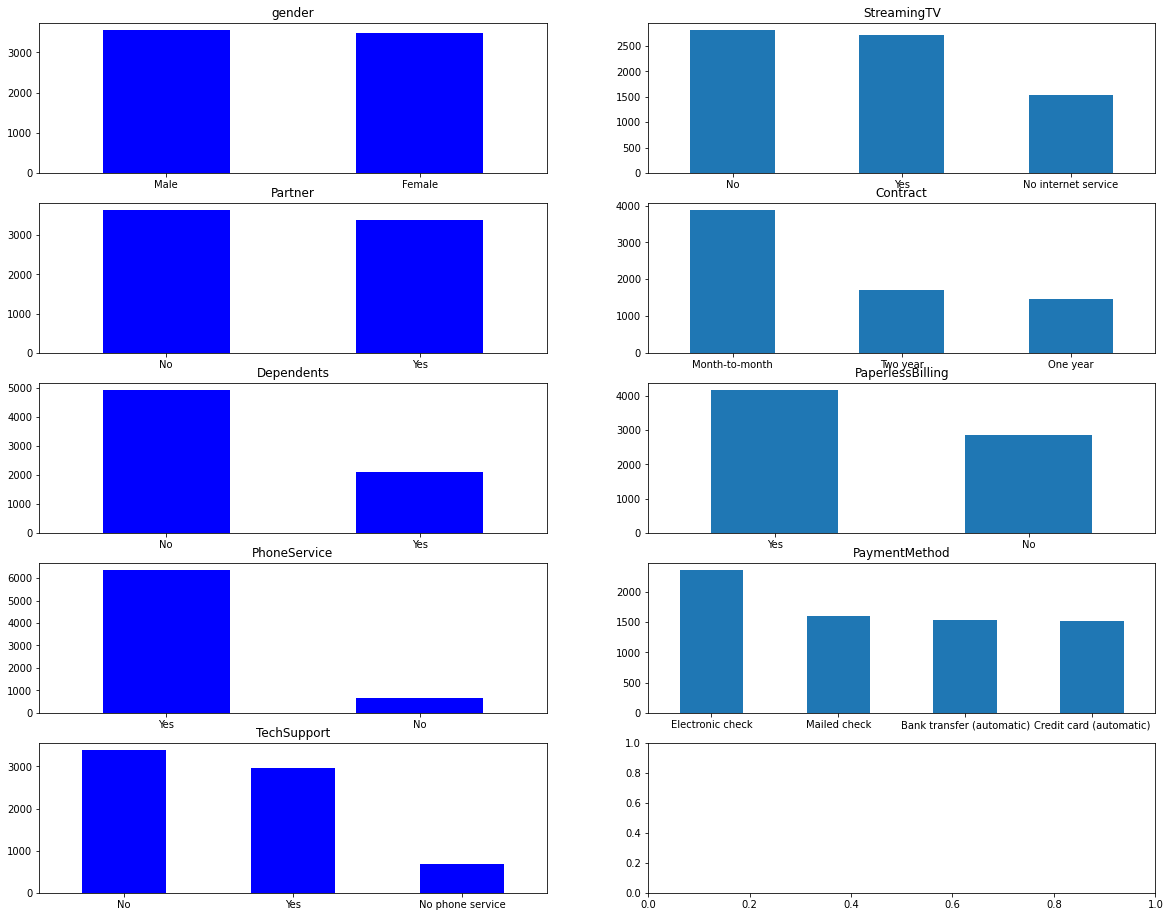

In [19]:
# Distribution of Categorical coulmns
Categorical_columns = churn_df[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','Contract','PaperlessBilling','PaymentMethod']]
fig, axes = plt.subplots(nrows = 5,ncols = 2, figsize = (20,16),squeeze=False)



for i, feature in enumerate(Categorical_columns):
    if i < 5:
        ax = churn_df[feature].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color='blue')
    
   
    elif i >=10 and i < 15:
        ax = churn_df[feature].value_counts().plot(kind = 'bar',ax=axes[i-10,1],rot = 0)

    ax.set_title(feature)

In [20]:
# Getting to know which gender has the higher levels of churning
churn_by_gender = churn_df[churn_df['Churn'].str.contains('Yes')].groupby('gender').count()
churn_by_gender

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,,,,,,,,,,,,,,,,,,,,
Female,939,939,939,939,939,939,939,939,939,939,939,939,939,939,939,939,939,939,939,939
Male,930,930,930,930,930,930,930,930,930,930,930,930,930,930,930,930,930,930,930,930


# Multi variate Data Analysis
In this section we conducted multi variate data analysis as well as answering our questions.

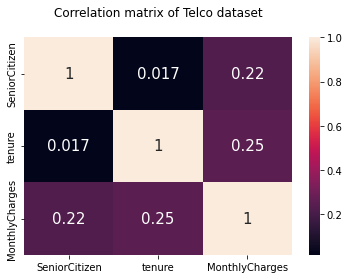

In [21]:
# Finding the correlation among the variables.
correlation = churn_df.corr()
heatmap = sns.heatmap(correlation, annot = True,annot_kws={'size': 15})
heatmap.set( title = "Correlation matrix of Telco dataset\n") 
plt.show ()  

<BarContainer object of 2 artists>

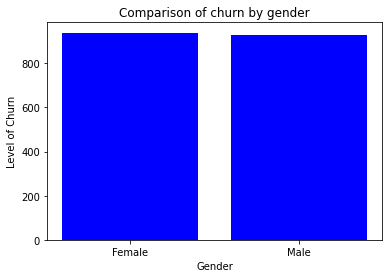

In [22]:
plt.xlabel('Gender')
plt.ylabel('Level of Churn')
plt.title('Comparison of churn by gender')
plt.bar(churn_by_gender.index, churn_by_gender['Churn'], color='blue')

The level of churn for both genders seems to be almost equal.

In [23]:
# Getting to know if monthly charges affects churn
#churn_yes_by_charges = churn_df[churn_df['Churn'].str.contains('Yes')].sort_values('MonthlyCharges', ascending=False)
#churn_yes_by_charges.head()

In [24]:
#churn_yes_by_charges.tail()

In [25]:
# Getting to know if monthly charges affects churn
#churn_no_by_charges = churn_df[churn_df['Churn'].str.contains('No')].sort_values('MonthlyCharges', ascending=False)
#churn_no_by_charges.head()

In [26]:
#churn_no_by_charges.tail()

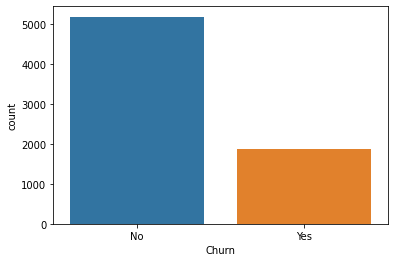

In [27]:
# Showing number of churned customers vs those who didn't
sns.countplot(x ='Churn', data = churn_df)
plt.show()
 

In [28]:
#Sorting by monthly charges to see effect on churn
churn_by_charges = churn_df.sort_values('MonthlyCharges', ascending=False)
churn_by_charges

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4586,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
2115,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.6,No
3894,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No
4804,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.7,No
5127,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6906,9945-PSVIP,Female,0,Yes,Yes,25,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,18.70,383.65,No
1156,0621-CXBKL,Female,0,No,No,53,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.70,1005.7,No
6652,0827-ITJPH,Male,0,No,No,36,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),18.55,689,No
1529,9764-REAFF,Female,0,Yes,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),18.40,1057.85,No


<AxesSubplot:title={'center':'Churn of customers for the top 500 highest monthly charges'}, xlabel='Churn', ylabel='count'>

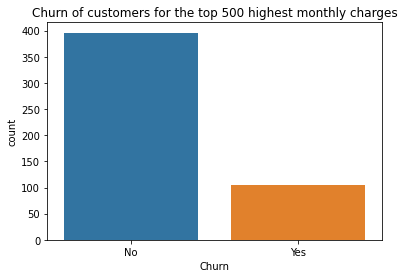

In [29]:
# Churn by highest charges plot
plt.title('Churn of customers for the top 500 highest monthly charges')
sns.countplot(x ='Churn', data = churn_by_charges.head(500))

<AxesSubplot:title={'center':'Churn of customers for the bottom 500 highest monthly charges'}, xlabel='Churn', ylabel='count'>

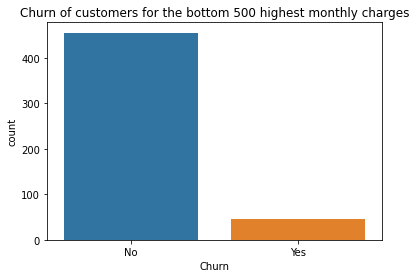

In [30]:
# Churn by lowest charges plot
plt.title('Churn of customers for the bottom 500 highest monthly charges')
sns.countplot(x ='Churn', data = churn_by_charges.tail(500))

The monthly charges does not seem to have a significant effect on a customer's desision to churn.

In [31]:
#churn = churn_yes_by_charges['Churn'].head(60).count()
#charges = churn_yes_by_charges['MonthlyCharges'].head(60)
#plt.bar(charges, churn, color='blue')

What is the relationship between tenure and churn?

In [32]:
churn_by_tenure = churn_df.sort_values('tenure', ascending=False)
churn_by_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1672,4737-AQCPU,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Credit card (automatic),72.10,5016.65,No
193,9680-NIAUV,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),109.70,8129.3,No
4553,5914-XRFQB,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),115.80,8424.9,No
483,5168-MQQCA,Female,0,Yes,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),108.50,8003.8,No
3266,0464-WJTKO,Female,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.10,1460.85,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0,No


<AxesSubplot:title={'center':'Churn of customers for top 500 highest tenures'}, xlabel='Churn', ylabel='count'>

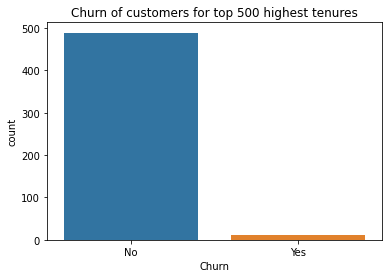

In [33]:
# Churn by highest tenure
plt.title('Churn of customers for top 500 highest tenures')
sns.countplot(x ='Churn', data = churn_by_tenure.head(500))

<AxesSubplot:title={'center':'Churn of customers for bottom 500 highest tenures'}, xlabel='Churn', ylabel='count'>

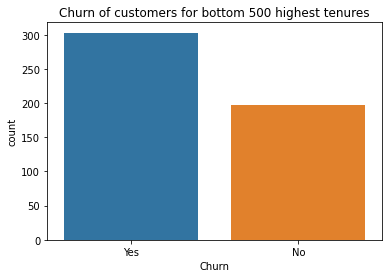

In [34]:
# Churn by lowest tenure
plt.title('Churn of customers for bottom 500 highest tenures')
sns.countplot(x ='Churn', data = churn_by_tenure.tail(500))

The longer the tenure of a customer the less likely they are to churn.

Do higher total charges increase likelihood of customer churn?

In [35]:
churn_by_tcharges = churn_df.sort_values('TotalCharges', ascending=False)
churn_by_tcharges

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2845,9093-FPDLG,Female,0,No,No,11,Yes,No,Fiber optic,No,...,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,94.20,999.9,No
3353,4536-PLEQY,Male,0,Yes,No,12,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),85.05,999.8,No
3686,5899-MQZZL,Female,0,No,No,13,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,75.00,999.45,Yes
5598,6051-PTVNS,Female,0,Yes,Yes,55,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.15,998.1,No
6646,8249-THVEC,Male,0,Yes,Yes,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.40,997.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No


<AxesSubplot:title={'center':'Churn of customers for top 500 highest total charges'}, xlabel='Churn', ylabel='count'>

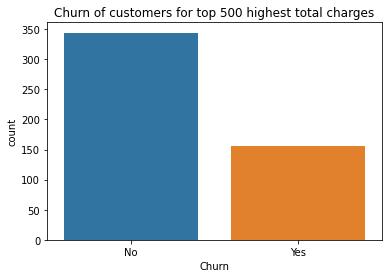

In [36]:
# Churn by highest total charges
plt.title('Churn of customers for top 500 highest total charges')
sns.countplot(x ='Churn', data = churn_by_tcharges.head(500))

<AxesSubplot:title={'center':'Churn of customers for top 500 lowest total charges'}, xlabel='Churn', ylabel='count'>

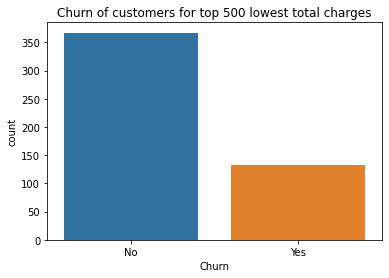

In [37]:
# Churn by highest total charges
plt.title('Churn of customers for top 500 lowest total charges')
sns.countplot(x ='Churn', data = churn_by_tcharges.tail(500))

Higher total charges does not seem to increase likelihood of customer churn

What factors seem to affect churn the most?

1.Tenure

# Dataset Splitting

In [38]:
from sklearn.model_selection import train_test_split

churn_train, churn_test = train_test_split(churn_df, test_size=0.2, random_state=42)

In [39]:
churn_train.shape

(5634, 21)

In [40]:
churn_test.shape

(1409, 21)

# Encoding

Using OneHotEncoder

In [41]:
churn_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2142,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,No
1623,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
6074,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
1362,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [42]:
# Cleaning the categorical columns
churn_train['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [43]:
churn_train['Partner'].unique()

array(['No', 'Yes'], dtype=object)

In [44]:
churn_train['Dependents'].unique()

array(['Yes', 'No'], dtype=object)

In [45]:
churn_train['PhoneService'].unique()

array(['Yes', 'No'], dtype=object)

In [46]:
churn_train['MultipleLines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [47]:
churn_train['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [48]:
churn_train['OnlineSecurity'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [49]:
churn_train['OnlineBackup'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [50]:
churn_train['DeviceProtection'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [51]:
churn_train['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [52]:
churn_train['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [53]:
churn_train['Contract'].unique()

array(['One year', 'Two year', 'Month-to-month'], dtype=object)

In [54]:
churn_train['PaperlessBilling'].unique()

array(['No', 'Yes'], dtype=object)

In [55]:
churn_train['PaymentMethod'].unique()

array(['Mailed check', 'Bank transfer (automatic)', 'Electronic check',
       'Credit card (automatic)'], dtype=object)

In [56]:
churn_train['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [75]:
# Proceeding to encode using OneHotEncoder.
cat_columns = churn_train['gender'],['Partner'],['Dependents'],['PhoneService'],['MultipleLines'],['InternetService'],['OnlineSecurity'],['OnlineBackup'],['DeviceProtection'],['TechSupport'],['StreamingTV'],['Contract'],['PaperlessBilling'],['PaymentMethod'],['Churn']
num_columns = churn_train['tenure'],['SeniorCitizen'],['MonthlyCharges'],['TotalCharges']

In [77]:
# Encoder instance
from sklearn.preprocessing import OneHotEncoder

cat_encoder= OneHotEncoder()

churn_train_encoded = pd.DataFrame(cat_encoder.fit_transform(cat_columns).toarray())
 
churn_train_encoded 

ValueError: ignored